<a href="https://colab.research.google.com/github/gmnmedeiros/strassen-matrix-multiplication-MSc/blob/main/MatrixMultiplication_EDCA_PPGI_Gabriel_Medeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### UFPB - PPGI
#### Mestrado em Informática
#### Estrutura de Dados e Análise de Algoritmos
#### Prof Dr Teobaldo Bulhões
#### Aluno Gabriel Medeiros do Nascimento

Para se localizar facilmente no notebook, usar a Table of Contents no menu à esquerda.

___________________________________________________________

### Projeto de implementação de multiplicação de algoritmos

Abaixo seguem os imports necessários.

In [1]:
# Imports

import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

___________________________________________________________
#### Arquivo de entrada:
Coloquei na função o nome "input.txt" para o arquivo de entrada. A função destrincha os parâmetros da mesma forma que foi exibido no arquivo da atividade

Na barra esquerda tem a opção de inserir um arquivo.

OBS.: Caso queira mudar o nome do arquivo de entrada, alterar linha indicada.

OBS.: Ao fim do notebook tem a possibilidade de testar sem usar arquivo de entrada, mas usando parâmetros manuais.

In [2]:
def read_input(input):
  # Se quiser alterar o arquivo de entrada, usar a última seção do notebook
  X = open("input.txt", "r")
  kmax = int(X.readline())
  r = int(X.readline())
  amin_max = str(X.readline())
  return kmax, r, amin_max

Mais adiante, na função de teste de caso, vou indexar o return dessa função para acessar cada um dos parâmetros.

___________________________________________________________
#### Algoritmo NAÏVE

Multiplicação simples das colunas e fileiras.

In [3]:
def naive_matrix(first_matrix,second_matrix):
    n = len(first_matrix)
    result = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i,j] += first_matrix[i,k] *second_matrix[k,j]
    return result

___________________________________________________________
#### **Algoritmo STRASSEN**

A seguinte solução é uma forma de otimização do algoritmo Strassen para Python onde foca-se em diminuir o número de variáveis.

Por exemplo: Ao invés de se criar uma variável `S1` para guardar `b12 - b22`, com o objetivo de ser acessada na terceira fase do algoritmo `P1 = strassen(a11,S1)`, ***esta solução pula direto para a fase P e cria chamadas recursivas acessando diretamente a primeira fase do algoritmo -a saber, a divisão das matrizes de input em submatrizes n/2.***

Uma das fontes de pesquisa para essa solução foi o repositório GitHub abaixo:

https://github.com/jaeho3690/Matrix_multiplication_python/blob/master/Algorithms_hw1_Report.pdf


In [4]:
def strassen(array_first,array_second):
    n = len(array_first)
    if n <= 4:
        return naive_matrix(array_first,array_second)
    else:
        a11 = array_first[:int(len(array_first)/2),:int(len(array_first)/2)]
        a12 = array_first[:int(len(array_first)/2),int(len(array_first)/2):]
        a21 = array_first[int(len(array_first)/2):,:int(len(array_first)/2)]
        a22 = array_first[int(len(array_first)/2):,int(len(array_first)/2):]

        b11 = array_second[:int(len(array_second)/2),:int(len(array_second)/2)]
        b12 = array_second[:int(len(array_second)/2),int(len(array_second)/2):]
        b21 = array_second[int(len(array_second)/2):,:int(len(array_second)/2)]
        b22 = array_second[int(len(array_second)/2):,int(len(array_second)/2):]
        
        P1 = strassen(a11,b12 - b22)
        P2 = strassen(a11 + a12,b22)
        P3 = strassen(a21 + a22,b11)
        P4 = strassen(a22,b21 - b11)
        P5 = strassen(a11 + a22,b11 + b22)
        P6 = strassen(a12 - a22,b21 + b22)
        P7 = strassen(a11 - a21,b11 + b12)

        result = np.zeros((n,n))
        result[:int(len(result)/2),:int(len(result)/2)] = P5 + P4 - P2 + P6
        result[:int(len(result)/2),int(len(result)/2):] = P1 + P2
        result[int(len(result)/2):,:int(len(result)/2)] = P3 + P4
        result[int(len(result)/2):,int(len(result)/2):] = P5 + P1 - P3 -P7
        return result

___________________________________________________________
#### Função de criação de testes para os algoritmos

Em primeiro lugar eu criei as variáveis a partir dos parâmetros do arquivo de entrada.

A lógica seguida foi: criar R pares de matrizes de tamanho entre 2**5 (valor mínimo) e 2**kmax que, para o arquivo usado, foi 9.

A cada iteração, o algoritmo Naïve era rodado, e após isso, o Strassen. 

Os tempos são medidos e guardados em variáveis que serão salvas no dataframe log.

Para a etapa de plotagem dos gráficos, o dataframe log será usado.

In [18]:
def test_algorithms():
    # Tamanho KMax deve ser potência de 2 || Matrizes terão tamanho de 2**5 a 2**kmaxx
    array_size = [2 ** i for i in range(5,read_input(input)[0])] #read_input(input)[0] = kmax


    # Log é o dataframe com os dados gerais dos testes.
    # A linha abaixo inicializa o df vazio
    log = pd.DataFrame(index=[], columns =[])
    
    amin = int(read_input(input)[2][:3]) 
    amax = int(read_input(input)[2][3:])
    number_matrices = read_input(input)[1]
    
    print(array_size)

    #Iniciando matrizes no número indicado no input com tamanho de 2**5 a 2**kmax
    for matrix in range(1,number_matrices):
      for size in array_size:
        array_1 = np.random.randint(low=amin,high=amax,size=(size,size),dtype=int)
        array_2 = np.random.randint(low=amin,high=amax,size=(size, size),dtype=int)

    #Contagem de tempo

    #Contagem de Naive Matrix
        print("Testando algoritmo Naive tamanho {}".format(size))
        start_time = 0
        start_time = time.time()
        result = naive_matrix(array_1,array_2)
        naive_duration = time.time()-start_time
    

    # Contagem do tempo de Strassen
        print("Testando algoritmo Strassen tamanho {}".format(size))
        start_time = 0
        start_time = time.time()
        result = strassen(array_1,array_2)
        strassen_duration = time.time()-start_time
    

        tmp = pd.Series([
            size,
            naive_duration,
            strassen_duration,           
        ], index=['Array_size','Naive_time','Strassen_time'])
        log = log.append(tmp,ignore_index=True)
        log.to_csv('new_time_complexity_python.csv',index=False)
    return log 

_______________________________________________________

### RODANDO O TESTE DOS ALGORITMOS

O output é um DataFrame com os dados de tempo preenchidos. Esse df é exportado para o arquivo `'new_time_complexity_python.csv'`

Com os parâmetros `kmax = 5, r = 50 e amin, amax = 150, 250` esse teste durou 19 minutos. 

Os resultados seguem abaixo, usando os parâmetros acima.


In [19]:
test_algorithms()

[32, 64, 128, 256]


,Array_size,Naive_time,Strassen_time
0,32.0,0.034839,0.024701
1,64.0,0.238385,0.176538
2,128.0,1.989026,1.229984
3,256.0,15.596120,8.596629
4,32.0,0.029470,0.036399
...,...,...,...
191,256.0,15.682903,8.829943
192,32.0,0.031260,0.024082
193,64.0,0.247449,0.189846
194,128.0,1.910902,1.229284


_______________________________________________________
### Plotar os gráficos

Para plotar os gráficos eu criei o dataframe `report` e fiz um processamento nele. Eu ordenei as observações com base no `Array_size` e depois `resetei o index`.

Após isso, fiz o plot do gráfico e o designei à variável `gr`

In [35]:
report = pd.read_csv("new_time_complexity_python.csv")

report.describe()

,Array_size,Naive_time,Strassen_time
count,196.000000,196.000000,196.000000
mean,120.000000,4.458813,2.523001
std,86.010137,6.511529,3.581721
min,32.000000,0.028439,0.023552
25%,56.000000,0.178235,0.136474
50%,96.000000,1.046321,0.687424
75%,160.000000,5.347503,3.084045
max,256.000000,15.806501,8.833875


In [ ]:
report_sort = report.sort_values(by=['Array_size'])
report_sort.reset_index(inplace=True, drop=True)

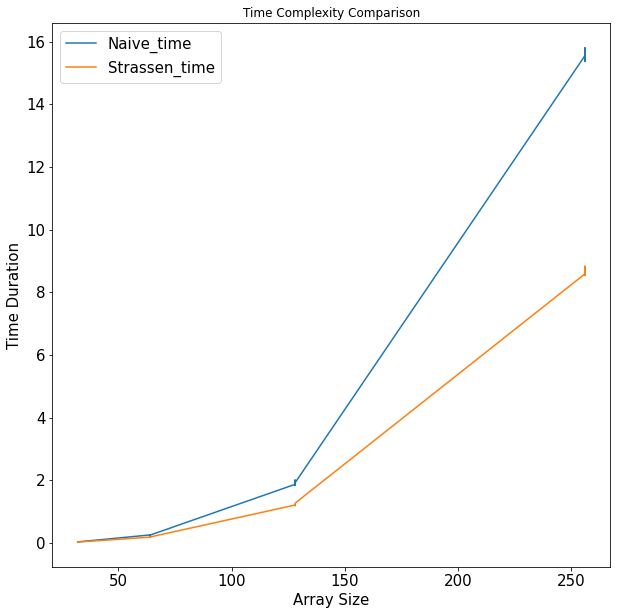

In [60]:
gr = report_sort.plot(x='Array_size',title='Time Complexity Comparison',figsize=(10,10),fontsize=15)
gr.set_xlabel("Array Size",fontsize=15)
gr.set_ylabel("Time Duration",fontsize= 15)
gr.legend(fontsize=15)
plt.savefig('time_complexity.png',dpi=300)

#### Conclusão

O algoritmo Strassen performa melhor que o algoritmo Naïve, conforme o gráfico acima explana.

_____________________________________________________________
### Para teste sem arquivo de entrada

Para testar o algoritmo usando parâmetros digitados, e não um arquivo de entrada, esta seção:

A função de criar um teste estará replicada abaixo, mas os parâmetros podem ser alterados na linha de chamada da função.

In [63]:
def test_manual(k_max, number_matrices, amin, amax):
    # Tamanho KMax deve ser potência de 2 || Matrizes terão tamanho de 2**5 a 2**kmaxx
    array_size = [2 ** i for i in range(5,k_max)] #read_input(input)[0] = kmax


    # Log é o dataframe com os dados gerais dos testes.
    # A linha abaixo inicializa o df vazio
    logManual = pd.DataFrame(index=[], columns =[])
    
    #amin = int(read_input(input)[2][:3]) 
    #amax = int(read_input(input)[2][3:])
    #number_matrices = read_input(input)[1]
    
    print(array_size)

    #Iniciando matrizes no número indicado no input com tamanho de 2**5 a 2**kmax
    for matrix in range(1,number_matrices):
      for size in array_size:
        array_1 = np.random.randint(low=amin,high=amax,size=(size,size),dtype=int)
        array_2 = np.random.randint(low=amin,high=amax,size=(size, size),dtype=int)

    #Contagem de tempo

    #Contagem de Naive Matrix
        print("Testando algoritmo Naive tamanho {}".format(size))
        start_time = 0
        start_time = time.time()
        result = naive_matrix(array_1,array_2)
        naive_duration = time.time()-start_time
    

    # Contagem do tempo de Strassen
        print("Testando algoritmo Strassen tamanho {}".format(size))
        start_time = 0
        start_time = time.time()
        result = strassen(array_1,array_2)
        strassen_duration = time.time()-start_time
    

        tmp = pd.Series([
            size,
            naive_duration,
            strassen_duration,           
        ], index=['Array_size','Naive_time','Strassen_time'])
        logManual = logManual.append(tmp,ignore_index=True)
        #logManual.to_csv('teste-parametro-manual.csv',index=False)

    # O retorno da função já é gráfico plotando o dataframe ordenado 
    return logManual.sort_values(by=['Array_size']).plot(x='Array_size',title='Time Complexity Comparison',figsize=(10,10),fontsize=15)

### TESTE ABAIXO:

Execute a função 

`test_manual(k_max, number_matrices, amin, amax)`

Onde: 

kmax = Expoente de 2 máximo para o tamanho de n. **DEVE SER MAIOR QUE 5**

number_matrices = Número de pares de matrizes gerados

amin = Número mínimo do intervalo de matrizes

amax = Número máximo do intervalo de matrizes


[32, 64, 128]
Testando algoritmo Naive tamanho 32
Testando algoritmo Strassen tamanho 32
Testando algoritmo Naive tamanho 64
Testando algoritmo Strassen tamanho 64
Testando algoritmo Naive tamanho 128
Testando algoritmo Strassen tamanho 128
Testando algoritmo Naive tamanho 32
Testando algoritmo Strassen tamanho 32
Testando algoritmo Naive tamanho 64
Testando algoritmo Strassen tamanho 64
Testando algoritmo Naive tamanho 128
Testando algoritmo Strassen tamanho 128
Testando algoritmo Naive tamanho 32
Testando algoritmo Strassen tamanho 32
Testando algoritmo Naive tamanho 64
Testando algoritmo Strassen tamanho 64
Testando algoritmo Naive tamanho 128
Testando algoritmo Strassen tamanho 128
Testando algoritmo Naive tamanho 32
Testando algoritmo Strassen tamanho 32
Testando algoritmo Naive tamanho 64
Testando algoritmo Strassen tamanho 64
Testando algoritmo Naive tamanho 128
Testando algoritmo Strassen tamanho 128
Testando algoritmo Naive tamanho 32
Testando algoritmo Strassen tamanho 32
Tes

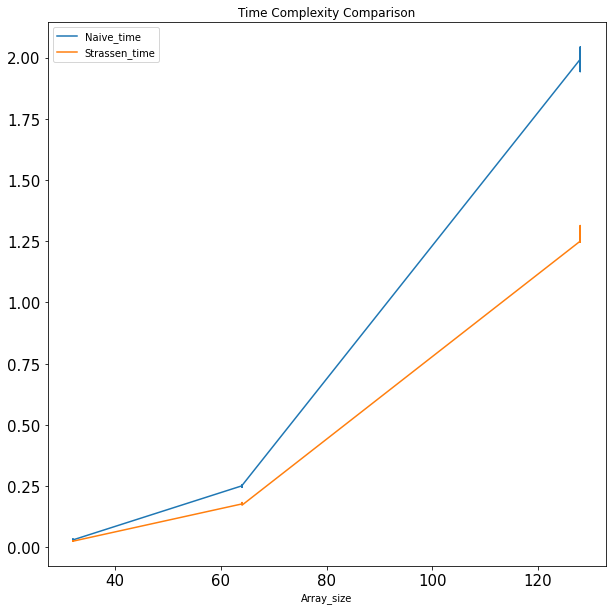

In [65]:
#Exemplo:

test_manual(8,7,100,120)

_____________________________________________________________
### Para teste com outro arquivo de entrada

Use esta seção para introduzir outro arquivo de entrada.

Basta fazer o upload do arquivo no menu à esquerda. 

Agora execute a função abaixo usando o nome do arquivo entre aspas como parâmetro.

In [67]:
def read_test_input(input):
  # Se quiser alterar o arquivo de entrada, usar a última seção do notebook
  X = open(input, "r")
  kmax = int(X.readline())
  r = int(X.readline())
  amin_max = str(X.readline())
  return kmax, r, amin_max

In [68]:
read_test_input(## Input aqui)

# Trocar o input na célula abaixo!

(6, 6, '150 250')

Função de teste dos algoritmos



In [ ]:
def test_arquivo():
# TROCAR AS FUNÇÕES NAS LINHAS INDICADAS COM UM $

    # Tamanho KMax deve ser potência de 2 || Matrizes terão tamanho de 2**5 a 2**kmaxx
    
#$
    array_size = [2 ** i for i in range(5,read_test_input(###)[0])] #read_input(input)[0] = kmax


    # Log é o dataframe com os dados gerais dos testes.
    # A linha abaixo inicializa o df vazio
    logArquivo = pd.DataFrame(index=[], columns =[])
#$
    amin = int(read_test_input(###)[2][:3]) 
#$
    amax = int(read_test_input(###)[2][3:])
#$
    number_matrices = read_test_input(###)[1]
    
    print(array_size)

    #Iniciando matrizes no número indicado no input com tamanho de 2**5 a 2**kmax
    for matrix in range(1,number_matrices):
      for size in array_size:
        array_1 = np.random.randint(low=amin,high=amax,size=(size,size),dtype=int)
        array_2 = np.random.randint(low=amin,high=amax,size=(size, size),dtype=int)

    #Contagem de tempo

    #Contagem de Naive Matrix
        print("Testando algoritmo Naive tamanho {}".format(size))
        start_time = 0
        start_time = time.time()
        result = naive_matrix(array_1,array_2)
        naive_duration = time.time()-start_time
    

    # Contagem do tempo de Strassen
        print("Testando algoritmo Strassen tamanho {}".format(size))
        start_time = 0
        start_time = time.time()
        result = strassen(array_1,array_2)
        strassen_duration = time.time()-start_time
    

        tmp = pd.Series([
            size,
            naive_duration,
            strassen_duration,           
        ], index=['Array_size','Naive_time','Strassen_time'])
        logArquivo = logManual.append(tmp,ignore_index=True)
        #logManual.to_csv('teste-parametro-manual.csv',index=False)

    # O retorno da função já é gráfico plotando o dataframe ordenado 
    return logArquivo.sort_values(by=['Array_size']).plot(x='Array_size',title='Time Complexity Comparison',figsize=(10,10),fontsize=15)

#### TESTE ABAIXO

(i) Faça o upload do arquivo

(ii) Altere a função acima nas linhas indicadas inserindo o nome do arquivo de entrada como parâmetro das funções `read_test_input(###)` no lugar dos "###"

(iii) Execute a função

`test_arquivo `
